# Predicting salaries using Logistic Regression

## Load in the the data of scraped salaries

In [1]:
## YOUR CODE HERE
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

In [2]:
data = pd.read_csv('../assets/indeed-scraped-job-postings.csv')
data

,city,company,salary,summary,title,parsed_salary
0,Denver,Department Of The Interior,"$76,341 - $99,243 a year","Would you like to join the more than 10,000 sc...","Statistician, GS-1350-12 (DEU-PERM-DS)",87792.0
1,Denver,Department Of The Interior,"$71,012 - $99,243 a year",Investigate potential uses of geospatial data ...,Interdisciplinary Cartographer/Geographer - GS...,85127.5
2,Denver,Mental Health Center of Denver,"$70,000 - $80,000 a year",Advise the Data Developer with regard to creat...,Financial Data Scientist,75000.0
3,Denver,Denver Public Schools,"$62,712 - $75,255 a year",Portal managers on student outcome data report...,SENIOR RESEARCH ANALYST,68983.5
4,Denver,University of Colorado,"$25,000 - $29,000 a year",Experience entering and manipulating data in a...,Animal Care I,27000.0
5,Denver,Denver Health,"$93,645 a year",Functions largely independently but reports to...,Assistant Research Scientist - RADARS,93645.0
6,Denver,Denver Health,"$66,654 a year","Assist research director, assistant research d...",Statistical Research Specialist,66654.0
7,Denver,Denver Health,"$66,654 a year","Assist research director, assistant research d...",Statistical Research Scientist - RADARS,66654.0
8,Denver,University of Colorado,"$65,000 - $90,000 a year",And effective working relationships with physi...,Regulatory & Compliance Manager,77500.0
9,Denver,"Computer Enterprises, Inc.","$130,000 a year",We are looking for a Software Engineer/Data Sc...,Software Engineer/Data Scientist,130000.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 6 columns):
city             413 non-null object
company          413 non-null object
salary           413 non-null object
summary          413 non-null object
title            413 non-null object
parsed_salary    406 non-null float64
dtypes: float64(1), object(5)
memory usage: 19.4+ KB


In [4]:
parsed_salary_null = pd.isnull(data['parsed_salary'])
data_science_salary_data_missing = data[parsed_salary_null == True]
Salary_data_missing_rows = data_science_salary_data_missing.index.values
Salary_data_missing_rows

array([ 41, 123, 124, 189, 310, 367, 389], dtype=int64)

In [5]:
Parsed_salary_missing_data = [(100/8)*2000,(120/8)*2000,
                              (120/8)*2000,(775/8)*2000,
                              (150/8)*2000,(82.5/8)*2000,(135/8)*2000]
Missing_salary = zip(Salary_data_missing_rows, Parsed_salary_missing_data)
for i,j in Missing_salary:
    data.at[i,'parsed_salary'] = j
data.head()

,city,company,salary,summary,title,parsed_salary
0,Denver,Department Of The Interior,"$76,341 - $99,243 a year","Would you like to join the more than 10,000 sc...","Statistician, GS-1350-12 (DEU-PERM-DS)",87792.0
1,Denver,Department Of The Interior,"$71,012 - $99,243 a year",Investigate potential uses of geospatial data ...,Interdisciplinary Cartographer/Geographer - GS...,85127.5
2,Denver,Mental Health Center of Denver,"$70,000 - $80,000 a year",Advise the Data Developer with regard to creat...,Financial Data Scientist,75000.0
3,Denver,Denver Public Schools,"$62,712 - $75,255 a year",Portal managers on student outcome data report...,SENIOR RESEARCH ANALYST,68983.5
4,Denver,University of Colorado,"$25,000 - $29,000 a year",Experience entering and manipulating data in a...,Animal Care I,27000.0


In [6]:
parsed_salary_mean = data.parsed_salary.mean()
parsed_salary_mean

106819.07869249395

In [7]:
parsed_salary_median = data.parsed_salary.median()
parsed_salary_median

100000.0

In [8]:
data.describe()

,parsed_salary
count,413.000000
mean,106819.078692
std,49610.232837
min,10000.000000
25%,67632.000000
50%,100000.000000
75%,141158.000000
max,300000.000000


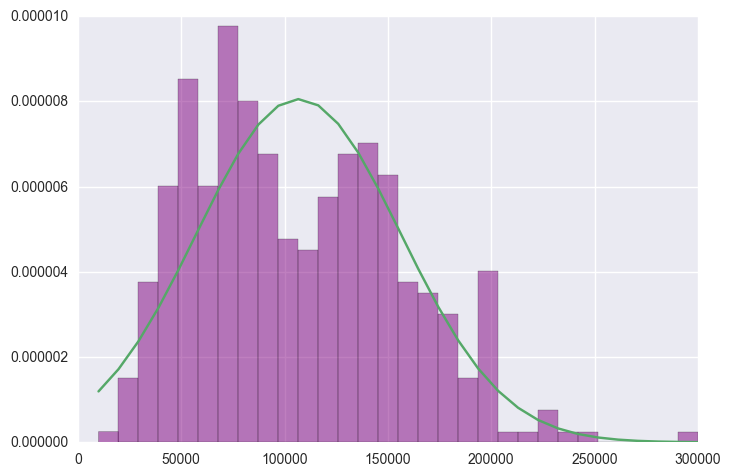

In [9]:
column_parsed_salary = data.parsed_salary
column_parsed_salary_mean = column_parsed_salary.mean()
column_parsed_salary_std = np.std(column_parsed_salary)
bin_num = 30


n, bins, patches = plt.hist(column_parsed_salary, 
                            bin_num, normed=1, facecolor='purple', alpha=0.5)
y = mlab.normpdf(bins, column_parsed_salary_mean,
                 column_parsed_salary_std)
plt.plot(bins, y)
plt.show()

### We want to predict a binary variable - whether the salary was low or high. Compute the median salary and create a new binary variable that is true when the salary is high (above the median)

We could also perform Linear Regression (or any regression) to predict the salary value here. Instead, we are going to convert this into a _binary_ classification problem, by predicting two classes, HIGH vs LOW salary.

While performing regression may be better, performing classification may help remove some of the noise of the extreme salaries. We don't have to choice the `median` as the splitting point - we could also split on the 75th percentile or any other reasonable breaking point.

In fact, the ideal scenario may be to predict many levels of salaries, 

In [10]:
## YOUR CODE HERE
data['salary_class'] = range(len(data))
for i, j in enumerate(data.parsed_salary):
    if j >= parsed_salary_mean:
        data['salary_class'].ix[i] = 1
    else:
        data['salary_class'].ix[i] = 0

C:\Users\ali\Anaconda2\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [11]:
data.head(5)

,city,company,salary,summary,title,parsed_salary,salary_class
0,Denver,Department Of The Interior,"$76,341 - $99,243 a year","Would you like to join the more than 10,000 sc...","Statistician, GS-1350-12 (DEU-PERM-DS)",87792.0,0
1,Denver,Department Of The Interior,"$71,012 - $99,243 a year",Investigate potential uses of geospatial data ...,Interdisciplinary Cartographer/Geographer - GS...,85127.5,0
2,Denver,Mental Health Center of Denver,"$70,000 - $80,000 a year",Advise the Data Developer with regard to creat...,Financial Data Scientist,75000.0,0
3,Denver,Denver Public Schools,"$62,712 - $75,255 a year",Portal managers on student outcome data report...,SENIOR RESEARCH ANALYST,68983.5,0
4,Denver,University of Colorado,"$25,000 - $29,000 a year",Experience entering and manipulating data in a...,Animal Care I,27000.0,0


#### Thought experiment: What is the baseline accuracy for this model?

In [12]:
## YOUR CODE HERE
baseline_accuracy = 1.0 - 1.0*data['salary_class'].mean()
baseline_accuracy

0.5351089588377724

## Create a Logistic Regression model to predict High/Low salary using statsmodel. Start by ONLY using the location as a feature. Display the coefficients and write a short summary of what they mean.

In [13]:
## YOUR CODE HERE
cities = data.city.unique()
data.city.value_counts()

New+York         103
San+Francisco     49
Boston            47
Chicago           36
Palo+Alto         27
Los+Angeles       24
Seattle           20
Atlanta           19
Denver            17
Dallas            12
Philadelphia      11
San+Diego         10
Pittsburgh         9
Houston            9
Austin             7
Phoenix            6
Miami              6
Portland           1
Name: city, dtype: int64

In [14]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
import statsmodels.api as sm

In [15]:
dummy_city = pd.get_dummies(data.city, prefix = 'city')
data = data.join(dummy_city)

In [16]:
feature_columns = data.columns[7:]
feature_columns

Index([u'city_Atlanta', u'city_Austin', u'city_Boston', u'city_Chicago',
       u'city_Dallas', u'city_Denver', u'city_Houston', u'city_Los+Angeles',
       u'city_Miami', u'city_New+York', u'city_Palo+Alto',
       u'city_Philadelphia', u'city_Phoenix', u'city_Pittsburgh',
       u'city_Portland', u'city_San+Diego', u'city_San+Francisco',
       u'city_Seattle'],
      dtype='object')

In [17]:
city_columns = data.columns.values.tolist()
city_columns = city_columns[7:]
city_dummy_only = data[feature_columns]
X = data[feature_columns]
Y = np.asarray(data.salary_class)

In [18]:
logit_model = sm.Logit(Y,X)
result = logit_model.fit()
result.summary()

         Current function value: 0.592991
         Iterations: 35


C:\Users\ali\Anaconda2\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  413
Model:                          Logit   Df Residuals:                      395
Method:                           MLE   Df Model:                           17
Date:                Thu, 19 Jan 2017   Pseudo R-squ.:                  0.1414
Time:                        00:00:14   Log-Likelihood:                -244.91
converged:                      False   LL-Null:                       -285.25
                                        LLR p-value:                 2.891e-10
======================================================================================
                         coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
city_Atlanta          -1.3218      0.563     -2.349      0.019        -2.425    -0.219
city_Austin           -0.2877      0.764     -0.377      0.706        -1.785     1.209
city_Boston            0.4769      0.300      1.589      0.112        -0.111     1.065
city_Chicago           0.1112      0.334      0.333      0.739        -0.543     0.766
city_Dallas           -0.6931      0.612     -1.132      0.258        -1.893     0.507
city_Denver           -2.0149      0.753     -2.677      0.007        -3.490    -0.539
city_Houston         -24.1523   5.85e+04     -0.000      1.000     -1.15e+05  1.15e+05
city_Los+Angeles      -0.1671      0.410     -0.408      0.683        -0.970     0.636
city_Miami            -1.6094      1.095     -1.469      0.142        -3.756     0.538
city_New+York         -0.3732      0.201     -1.861      0.063        -0.766     0.020
city_Palo+Alto         0.8650      0.421      2.052      0.040         0.039     1.691
city_Philadelphia      0.5596      0.627      0.893      0.372        -0.669     1.788
city_Phoenix         -25.4092   1.34e+05     -0.000      1.000     -2.63e+05  2.63e+05
city_Pittsburgh      -24.1523   5.85e+04     -0.000      1.000     -1.15e+05  1.15e+05
city_Portland        -16.7883   4421.073     -0.004      0.997     -8681.932  8648.355
city_San+Diego        -0.4055      0.645     -0.628      0.530        -1.671     0.860
city_San+Francisco     1.1260      0.332      3.390      0.001         0.475     1.777
city_Seattle                0      0.447          0      1.000        -0.877     0.877
======================================================================================
"""

In [19]:
clf = linear_model.LogisticRegression()
clf.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [20]:
clf.score(X,Y)

0.66101694915254239

## Create a few new variables in your dataframe to represent interesting features of a job title.
- For example, create a feature that represents whether 'Senior' is in the title 
- or whether 'Manager' is in the title. 
- Then build a new Logistic Regression model with these features. Do they add any value? 


In [21]:
## YOUR CODE HERE

### Field

In [22]:
data_scientist = ['statistical', 'statistician', 'machine learning', 'scientist', 'science', 
                  'big data', 'research', 'researcher', 'deep learning', 'nlp', 'natural language processing',
                  'predictive ', 'predictive', 'learning', 'hadoop', 'modeling', 'modeler', 
                  'time series', 'postdoctoral', 'phd']

In [23]:
data_analyst = ['analyst', 'analysis', 'business intelligence', 'analytics',
                'intelligence', 'data administrator', 'sql']

In [24]:
engineer = ['developer', 'C++', 'java', 'software', 'engineer', 'python', 'devops', 
            'product development', '.js', 'front end', 'applications', 'application']

In [25]:
solution_architect = ['architect', 'system', 'network', 'solution']

### Industry

In [26]:
advance_analytics = ['machine learning', 'scientist','nlp', 'natural language processing', 'predictive',
                     'predictive ', 'deep learning', 'machine learning', 'learning', 'big data', 'research',
                     'science', 'hadoop', 'modeling', 'modeler', 'time series', 'postdoctoral', 'phd']

In [27]:
analytics =['statisticial',  'statistician,', 'statistician',
            'analyst', 'analysis', 'analytics', 'sql']

In [28]:
tech = ['software', 'developer', 'devops', 'deep learning', 'sql', 'engineer', 'architect'] 

In [29]:
finance_ind = ['finance', 'financial', 'credit', 'risk', 'bank', 'banking', 'business',
                'investment', 'hedge fund', 'income', 'equity', 'budget', 'fraud', 'credit'] 

In [30]:
life_sciences_ind = ['health', 'healthcare', 'enviromental', 'lab', 'life science', 'life sciences', 'chemist',
                    'medical', 'clinical', 'fitness', 'food', 'biotech', 'disease', 'pharma',
                    'epidemiologist', 'toxicologist', 'toxicology', 'laboratory', 'quality assureance',
                    'lab', 'biologics', 'behavioral', 'psychologist', 'bioinformatics', 'quality', 'compliance']

In [31]:
makreting_ind = ['digital', 'marketing', 'market', 'seo']

### Levels:

In [32]:
mid_level = ['sr.', 'sr ', 'senior', 'associate', 'specialist', 'professional',
            'lead', 'principal', 'advanced', 'staff', 'chief', 'iii', ' iv ', 'mid-level']

In [33]:
top_level = ['manager', 'director', 'dir,' 'executive', 'vp', 'head']

In [34]:
entry_level = ['junior', 'jr.', 'jr ', 'assitant', 'enetry level', 'technician', 'ii']

### Creating dataframe with dummy variables:
##### Level:

In [35]:
data['title_lowercase'] = data['title']
data['title_lowercase'] = data.title_lowercase.str.lower()
data['title_keywords'] = 0
data.head(1)

,city,company,salary,summary,title,parsed_salary,salary_class,city_Atlanta,city_Austin,city_Boston,...,city_Palo+Alto,city_Philadelphia,city_Phoenix,city_Pittsburgh,city_Portland,city_San+Diego,city_San+Francisco,city_Seattle,title_lowercase,title_keywords
0,Denver,Department Of The Interior,"$76,341 - $99,243 a year","Would you like to join the more than 10,000 sc...","Statistician, GS-1350-12 (DEU-PERM-DS)",87792.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"statistician, gs-1350-12 (deu-perm-ds)",0


In [36]:
data['level'] = 0

In [37]:
for i, title in enumerate(data.title_lowercase):
    a = title.split()
    for b in a:
        if b in entry_level:
            data.level[i] = 'entry level'
            break
        if b in mid_level:
            data.level[i] = 'mid level'
            break
        if b in top_level:
            data.level[i] = 'to level'
            break 
        else:
            data.level[i] = 'unknown'

C:\Users\ali\Anaconda2\lib\site-packages\ipykernel\__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\ali\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\ali\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\ali\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame



In [38]:
data.level.value_counts()

unknown        255
mid level      112
to level        30
entry level     16
Name: level, dtype: int64

#### Field

In [39]:
for i, title in enumerate(data.title_lowercase):
    a = title.split()
    for b in a:
        if b in data_scientist:
            data.title_keywords[i] = 'data scientist'
            break
        if b in data_analyst:
            data.title_keywords[i] = 'data analyst'
            break
        if b in engineer:
            data.title_keywords[i] = 'engineer'
            break 
        if b in solution_architect:
            data.title_keywords[i] = 'solution architect'
        if 'data scientist' in title or 'Data Science' in title:
            data.title_keywords[i] = 'data scientist'
            break
        else:
            data.title_keywords[i] = 'other'

C:\Users\ali\Anaconda2\lib\site-packages\ipykernel\__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\ali\Anaconda2\lib\site-packages\ipykernel\__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\ali\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\ali\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame


In [40]:
data.title_keywords.value_counts()

data scientist    261
other              67
engineer           49
data analyst       36
Name: title_keywords, dtype: int64

#### Industry

In [41]:
data['industry'] = 0

In [42]:
for i, title in enumerate(data.title_lowercase):
    a = title.split()
    
    for b in a:        
        if b in advance_analytics:
            data.industry[i] = 'advance analytics'
            break        
        if b in tech:
            data.industry[i] = 'tech'
            break        
        if b in analytics:
            data.industry[i] = 'analytics'
            break        
        if b in life_sciences_ind:
            data.industry[i] = 'life sciences'
            break
        if b in finance_ind:
            data.industry[i] = 'finance'
            break
        if b in makreting_ind:
            data.industry[i] = 'marketing'
            break 
        if 'data scientist' in title or 'Data Science' in title:
            data.industry[i] = 'analytics'
            break
        else:
            data.industry[i] = 'other'

C:\Users\ali\Anaconda2\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\ali\Anaconda2\lib\site-packages\ipykernel\__main__.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\ali\Anaconda2\lib\site-packages\ipykernel\__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\ali\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame


In [43]:
data.industry.value_counts()

analytics            152
advance analytics    101
tech                  50
other                 46
life sciences         32
finance               22
marketing             10
Name: industry, dtype: int64

### Dataframe with added Features

In [44]:
data_science_salary_data = data
data_science_salary_data.columns

Index([u'city', u'company', u'salary', u'summary', u'title', u'parsed_salary',
       u'salary_class', u'city_Atlanta', u'city_Austin', u'city_Boston',
       u'city_Chicago', u'city_Dallas', u'city_Denver', u'city_Houston',
       u'city_Los+Angeles', u'city_Miami', u'city_New+York', u'city_Palo+Alto',
       u'city_Philadelphia', u'city_Phoenix', u'city_Pittsburgh',
       u'city_Portland', u'city_San+Diego', u'city_San+Francisco',
       u'city_Seattle', u'title_lowercase', u'title_keywords', u'level',
       u'industry'],
      dtype='object')

In [45]:
d1 = pd.get_dummies(data_science_salary_data.title_keywords, prefix = 'title')
d2 = pd.get_dummies(data_science_salary_data.level, prefix = 'level')
d3 = pd.get_dummies(data_science_salary_data.industry, prefix = 'industry')
D = [d1,d2,d3]
data_science_salary_data = data_science_salary_data.join(D)

In [46]:
data_science_salary_data = data_science_salary_data.drop(
    ['city', 'company', 'salary', 'summary', 'title', 'title_lowercase', 
    'title_keywords', 'level', 'industry'], axis=1)
data_science_salary_data.columns

Index([u'parsed_salary', u'salary_class', u'city_Atlanta', u'city_Austin',
       u'city_Boston', u'city_Chicago', u'city_Dallas', u'city_Denver',
       u'city_Houston', u'city_Los+Angeles', u'city_Miami', u'city_New+York',
       u'city_Palo+Alto', u'city_Philadelphia', u'city_Phoenix',
       u'city_Pittsburgh', u'city_Portland', u'city_San+Diego',
       u'city_San+Francisco', u'city_Seattle', u'title_data analyst',
       u'title_data scientist', u'title_engineer', u'title_other',
       u'level_entry level', u'level_mid level', u'level_to level',
       u'level_unknown', u'industry_advance analytics', u'industry_analytics',
       u'industry_finance', u'industry_life sciences', u'industry_marketing',
       u'industry_other', u'industry_tech'],
      dtype='object')

In [47]:
print data_science_salary_data.shape
data_science_salary_data.head()

(413, 35)


,parsed_salary,salary_class,city_Atlanta,city_Austin,city_Boston,city_Chicago,city_Dallas,city_Denver,city_Houston,city_Los+Angeles,...,level_mid level,level_to level,level_unknown,industry_advance analytics,industry_analytics,industry_finance,industry_life sciences,industry_marketing,industry_other,industry_tech
0,87792.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,85127.5,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,75000.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,68983.5,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,27000.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [48]:
feature_columns = data_science_salary_data.columns[2:]
feature_columns

Index([u'city_Atlanta', u'city_Austin', u'city_Boston', u'city_Chicago',
       u'city_Dallas', u'city_Denver', u'city_Houston', u'city_Los+Angeles',
       u'city_Miami', u'city_New+York', u'city_Palo+Alto',
       u'city_Philadelphia', u'city_Phoenix', u'city_Pittsburgh',
       u'city_Portland', u'city_San+Diego', u'city_San+Francisco',
       u'city_Seattle', u'title_data analyst', u'title_data scientist',
       u'title_engineer', u'title_other', u'level_entry level',
       u'level_mid level', u'level_to level', u'level_unknown',
       u'industry_advance analytics', u'industry_analytics',
       u'industry_finance', u'industry_life sciences', u'industry_marketing',
       u'industry_other', u'industry_tech'],
      dtype='object')

In [49]:
# X = np.asarray(data_science_salary_data[feature_columns])
# Y = np.asarray(data_science_salary_data.salary_class)
X = data_science_salary_data[feature_columns]
y = data_science_salary_data.salary_class

In [50]:
logit_model = sm.Logit(Y,X)
result = logit_model.fit()
result.summary()

         Current function value: 0.459633
         Iterations: 35


C:\Users\ali\Anaconda2\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  413
Model:                          Logit   Df Residuals:                      383
Method:                           MLE   Df Model:                           29
Date:                Thu, 19 Jan 2017   Pseudo R-squ.:                  0.3345
Time:                        00:04:07   Log-Likelihood:                -189.83
converged:                      False   LL-Null:                       -285.25
                                        LLR p-value:                 9.677e-26
==============================================================================================
                                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
city_Atlanta                   3.7686    6.6e+06   5.71e-07      1.000     -1.29e+07  1.29e+07
city_Austin                    4.5673   5.74e+06   7.95e-07      1.000     -1.13e+07  1.13e+07
city_Boston                    5.1588   6.38e+06   8.08e-07      1.000     -1.25e+07  1.25e+07
city_Chicago                   4.4077   7.09e+06   6.22e-07      1.000     -1.39e+07  1.39e+07
city_Dallas                    3.2778   6.53e+06   5.02e-07      1.000     -1.28e+07  1.28e+07
city_Denver                    3.3736   6.95e+06   4.85e-07      1.000     -1.36e+07  1.36e+07
city_Houston                 -16.5197   6.96e+06  -2.37e-06      1.000     -1.36e+07  1.36e+07
city_Los+Angeles               5.4423   6.82e+06   7.98e-07      1.000     -1.34e+07  1.34e+07
city_Miami                     3.4759   5.91e+06   5.88e-07      1.000     -1.16e+07  1.16e+07
city_New+York                  4.7038   7.36e+06   6.39e-07      1.000     -1.44e+07  1.44e+07
city_Palo+Alto                 5.8854   4.64e+06   1.27e-06      1.000     -9.09e+06  9.09e+06
city_Philadelphia              4.8577   6.23e+06    7.8e-07      1.000     -1.22e+07  1.22e+07
city_Phoenix                 -16.9293   7.09e+06  -2.39e-06      1.000     -1.39e+07  1.39e+07
city_Pittsburgh              -22.7346    7.1e+06   -3.2e-06      1.000     -1.39e+07  1.39e+07
city_Portland                -17.0961   6.52e+06  -2.62e-06      1.000     -1.28e+07  1.28e+07
city_San+Diego                 4.6530   6.82e+06   6.83e-07      1.000     -1.34e+07  1.34e+07
city_San+Francisco             6.0227   6.23e+06   9.67e-07      1.000     -1.22e+07  1.22e+07
city_Seattle                   5.7981   6.89e+06   8.42e-07      1.000     -1.35e+07  1.35e+07
title_data analyst            -2.5291   7.12e+06  -3.55e-07      1.000      -1.4e+07   1.4e+07
title_data scientist          -1.6492   7.26e+06  -2.27e-07      1.000     -1.42e+07  1.42e+07
title_engineer                -0.1163    6.7e+06  -1.74e-08      1.000     -1.31e+07  1.31e+07
title_other                   -3.5923   6.96e+06  -5.16e-07      1.000     -1.36e+07  1.36e+07
level_entry level             -3.1823        nan        nan        nan           nan       nan
level_mid level               -1.9477        nan        nan        nan           nan       nan
level_to level                 0.1198        nan        nan        nan           nan       nan
level_unknown                 -2.8766        nan        nan        nan           nan       nan
industry_advance analytics    -1.6111    1.2e+07  -1.34e-07      1.000     -2.36e+07  2.36e+07
industry_analytics             0.2974    1.2e+07   2.47e-08      1.000     -2.36e+07  2.36e+07
industry_finance              -0.0300    1.2e+07  -2.49e-09      1.000     -2.36e+07  2.36e+07
industry_life sciences        -1.7148    1.2e+07  -1.42e-07      1.000     -2.36e+07  2.36e+07
industry_marketing            -2.4724    1.2e+07  -2.05e-07      1.000     -2.36e+07  2.36e+07
industry_ot

#### Rebuild this model with scikit-learn.
- You can either create the dummy features manually or use the `dmatrix` function from `patsy`
- Remember to scale the feature variables as well!


In [51]:
# from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import cross_validation#, model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


C:\Users\ali\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Evaluate - Cross Validation Score / 5 folds

In [52]:
lr = LogisticRegression(penalty = 'l2', C =1)
lr.fit(X, y)
print ('INTIAL MODEL ACCURACY (NO Cross Validation:', lr.score(X, y))

('INTIAL MODEL ACCURACY (NO Cross Validation:', 0.76271186440677963)


In [53]:
scores = cross_val_score(lr, X, y, scoring = 'accuracy', cv =5)
print ('CV 5-FOLD Scores: ', scores)
print ('CV 5-FOLD Mean Accuracy', scores.mean())
print ('CV 5-FOLD Standard Deviation of Accuracy', scores.std)

('CV 5-FOLD Scores: ', array([ 0.76190476,  0.69879518,  0.7195122 ,  0.6097561 ,  0.80487805]))
('CV 5-FOLD Mean Accuracy', 0.71896925681821366)
('CV 5-FOLD Standard Deviation of Accuracy', <built-in method std of numpy.ndarray object at 0x000000000E6EDC10>)


### Classification - Type 1 and type 2 error

Accuracy: 0.7445
[[57 19]
 [16 45]]
Confusion Matrix for Type I and Type II Error


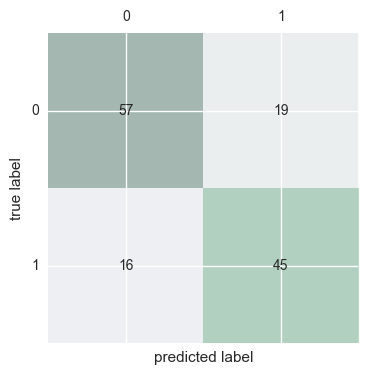

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=1)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
from sklearn.metrics import accuracy_score
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(confmat, cmap=plt.cm.Greens, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i,
            s=confmat[i, j],
            va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
print('Confusion Matrix for Type I and Type II Error')
plt.show()

In [55]:
from sklearn.metrics import classification_report
target_names = ['Benign', 'Malignant']
y_true = y_test
print('Classification Report: ')
print(classification_report(y_true, y_pred, target_names=target_names))

Classification Report: 
             precision    recall  f1-score   support

     Benign       0.78      0.75      0.77        76
  Malignant       0.70      0.74      0.72        61

avg / total       0.75      0.74      0.75       137



### Scale

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

pipe_lr = Pipeline([ ('scl', StandardScaler()), ('clf', LogisticRegression(
            random_state=1))])
pipe_lr.fit(X_train, y_train)

print('Scaled/Standardized Improved Test Accuracy: %.4f'
      % pipe_lr.score(X_test, y_test))
pipe_lr

Scaled/Standardized Improved Test Accuracy: 0.7299


Pipeline(steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

### Grid Search - Tuning the  model

In [57]:
from sklearn.grid_search import GridSearchCV
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'clf__C': param_range}]

gs = GridSearchCV(estimator=pipe_lr, param_grid=param_grid, scoring='accuracy',
                 cv=10, n_jobs=-1)

gs = gs.fit(X_train, y_train)

print('Grid Search Best Score: %.4f' % gs.best_score_)
print('Grid Search Best Parameter for C: ')
print gs.best_params_

C:\Users\ali\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Grid Search Best Score: 0.7319
Grid Search Best Parameter for C: 
{'clf__C': 0.1}


### PLotting

C:\Users\ali\Anaconda2\lib\site-packages\sklearn\learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


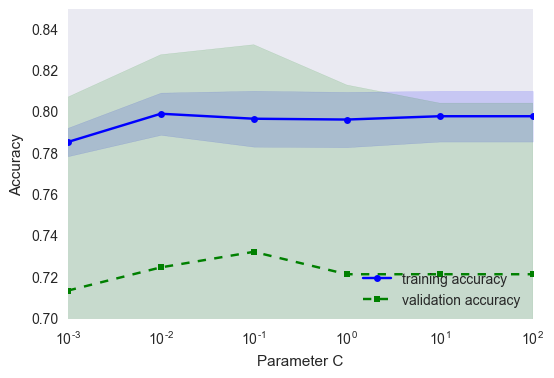

NOTE:  This plot confirms the best choice of C as 0.1 made by the GridSearchCV


In [58]:
from sklearn.learning_curve import validation_curve
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn

param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(estimator=pipe_lr, X=X_train, y=y_train, param_name='clf__C', 
                                             param_range=param_range, cv=10)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')

plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')

plt.fill_between(param_range,test_mean + test_std,test_mean - test_std,alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.7, 0.85])
plt.xlim([10**-3, 100])
plt.show()
print('NOTE:  This plot confirms the best choice of C as 0.1 made by the GridSearchCV')

NOTE:  This plot confirms the above-mentionedClassification Report with its excellent results.


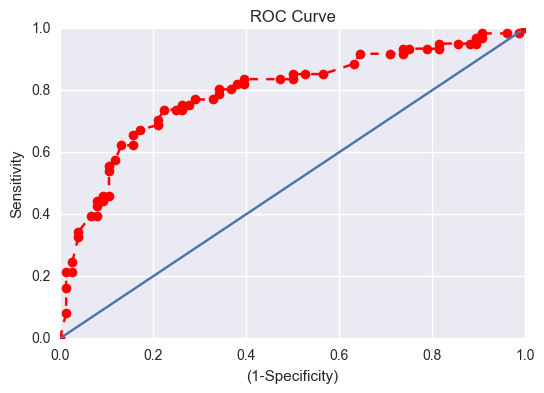

In [60]:
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline
import seaborn
prob = lr.predict_proba(X_test)[:,1]
fpr, sensitivity, _ = metrics.roc_curve(y_test, prob)
plt.plot(fpr,sensitivity,marker='o',linestyle='--',color='r')
x=[i*0.01 for i in range(100)]
y=[i*0.01 for i in range(100)]
plt.plot(x,y)
plt.xlabel('(1-Specificity)')
plt.ylabel('Sensitivity')
plt.title('ROC Curve')
print('NOTE:  This plot confirms the above-mentioned\
Classification Report with its excellent results.')

#### Compare L1 and L2 regularization for this logistic regression model. What effect does this have on the coefficients learned?

In [ ]:
## YOUR CODE HERE

In [ ]:
lrl1 = LogisticRegression(penalty='l1', C=1)
lrl1.fit(X_test, y_test)
scores = cross_val_score(lrl1, X_test, y_test, scoring='accuracy', cv=10)
print ("Cross Validation 10 Fold Accuracy with L1 regularization Scores:  ", scores)
print ("Cross Validation 10 Fold Accuracy with L1 regularization Means:  ", scores.mean())

In [ ]:
lrl2 = LogisticRegression(penalty='l2', C=1)
lrl2.fit(X_test, y_test)
scores = cross_val_score(lrl2, X_test, y_test, scoring='accuracy', cv=10)
print ("Cross Validation 10 Fold Accuracy with L2 regularization Scores:  ", scores)
print ("Cross Validation 10 Fold Accuracy with L2 regularization Means:  ", scores.mean())

#### Continue to incorporate other text features from the title or summary that you believe will predict the salary and examine their coefficients

#### Take ~100 scraped entries with salaries. Convert them to use with your model and predict the salary - which entries have the highest predicted salaries?

### BONUS 

#### Bonus: Use Count Vectorizer from scikit-learn to create features from the text summaries. 
- Examine using count or binary features in the model
- Re-evaluate the logistic regression model using these. Does this improve the model performance? 
- What text features are the most valuable? 

In [ ]:
## YOUR CODE HERE

In [ ]:
## YOUR CODE HERE

#### Re-test L1 and L2 regularization. You can use LogisticRegressionCV to find the optimal reguarlization parameters. 
- Re-test what text features are most valuable.  
- How do L1 and L2 change the coefficients?

In [ ]:
## YOUR CODE HERE